<a href="https://colab.research.google.com/github/okyass/MVA-DL-MP1/blob/master/MVA_MP1_Yassine_Oketokoun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yassine Oketokoun - Ecole Centrale Paris**
# **Deep Learning : Mini Projet 1 **

Using TensorFlow backend.


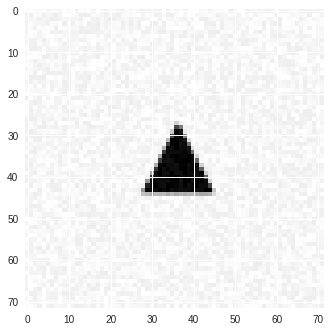

In [0]:
from mp1 import *
import numpy as np
import keras
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers.core import Dense,Flatten,Dropout
from keras.layers import BatchNormalization,Input,concatenate,Cropping2D,ZeroPadding2D,Conv2D, MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.optimizers import SGD,Adam,Adagrad
from keras import regularizers
import keras.backend as K
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Simple Classification

Nous allons construire un classifieur linéaire qui permettra de classer des images centrées dans l'une des trois catégories : rectangle, triangle, disque

In [0]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

nb_classes=3
y_train = np_utils.to_categorical(Y_train, nb_classes)

Creating data:


In [0]:
input_shape = X_train.shape[1]
batch_size = 32
epochs= 100

In [0]:
model_sgd = Sequential()
model_sgd.add(Dense(nb_classes, input_shape=(input_shape,), activation='softmax'))
model_sgd.summary()

sgd = SGD(lr = 0.001)
model_sgd.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)
model_sgd.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 2s 7ms/step - loss: 1.1681 - acc: 0.3433
Epoch 2/100
300/300 [==============================] - 0s 158us/step - loss: 1.0715 - acc: 0.4567
Epoch 3/100
300/300 [==============================] - 0s 161us/step - loss: 0.9092 - acc: 0.5933
Epoch 4/100
300/300 [==============================] - 0s 156us/step - loss: 0.9039 - acc: 0.6033
Epoch 5/100
300/300 [==============================] - 0s 160us/step - loss: 0.7898 - acc: 0.7000
Epoch 6/100
300/300 [==============================] - 0s 169us/step - loss: 0.8052 - acc: 0.6667
Epoch 7/100
300/300 [==============================] - 0s 170us/step - loss: 0.7

In [0]:
model_a = Sequential()
model_a.add(Dense(nb_classes, input_shape=(input_shape,), activation='softmax'))
model_a.summary()

adam  = Adam()
model_a.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=adam)
model_a.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 0s 616us/step - loss: 1.5742 - acc: 0.4167
Epoch 2/100
300/300 [==============================] - 0s 168us/step - loss: 0.7393 - acc: 0.7167
Epoch 3/100
300/300 [==============================] - 0s 185us/step - loss: 0.4825 - acc: 0.8367
Epoch 4/100
300/300 [==============================] - 0s 249us/step - loss: 0.3771 - acc: 0.8633
Epoch 5/100
300/300 [==============================] - 0s 161us/step - loss: 0.3052 - acc: 0.9100
Epoch 6/100
300/300 [==============================] - 0s 187us/step - loss: 0.2419 - acc: 0.9733
Epoch 7/100
300/300 [==============================] - 0s 179us/step - loss: 0

La précision de notre modèle sur les données train est bien meilleure avec la méthode Adam : elle vaut 1 .

### **Verification** **sur** **l**'**ensemble** **de** **test** :

In [0]:
#avec un seul disque
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model_sgd.predict(X_test) # [0,1,0] est bien un disque
model_a.predict(X_test) # [0,1,0] est bien un disque

array([[0., 1., 0.]], dtype=float32)

In [0]:
#ensemble de test plus grand
[X_test,Y_test] = generate_dataset_classification(300, 20)
Y_test = np_utils.to_categorical(Y_test, nb_classes)
print("Précision Adam sur testset : ",model_a.evaluate(X_test,Y_test)[1])
print("Précision SGD sur testset : ",model_sgd.evaluate(X_test,Y_test)[1])

Creating data:
300/300 [==============================] - 0s 196us/step
Précision Adam sur testset :  1.0
300/300 [==============================] - 0s 183us/step
Précision SGD sur testset :  0.923333334128062


**Dans la suite, on utilisera la methode d'Adam qui est plus précise :**

In [0]:
model = model_a

# **Visualisation de la solution**

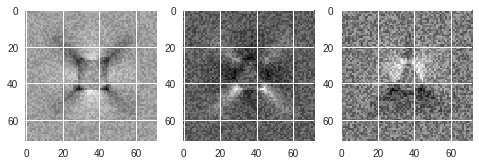

In [0]:
weights = model.get_weights()[0]

c1 = weights[:,0].reshape((int(np.sqrt(input_shape)),int(np.sqrt(input_shape))))
c2 = weights[:,1].reshape((int(np.sqrt(input_shape)),int(np.sqrt(input_shape))))
c3 = weights[:,2].reshape((int(np.sqrt(input_shape)),int(np.sqrt(input_shape))))


_, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(c1,cmap = 'gray')
ax2.imshow(c2,cmap = 'gray')
ax3.imshow(c3,cmap = 'gray')

# **Problème de classification plus difficile**

Dans cette partie, les images ne sont plus forcément centrées et ont des tailles variables.

In [0]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_test, Y_test] = generate_test_set_classification()

nb_classes = 3
Y_train = np_utils.to_categorical(Y_train, nb_classes)

Creating data:
Creating data:


In [0]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
300/300 [==============================] - 0s 251us/step - loss: 5.4415 - acc: 0.3867
Epoch 2/100
300/300 [==============================] - 0s 170us/step - loss: 5.7562 - acc: 0.3667
Epoch 3/100
300/300 [==============================] - 0s 176us/step - loss: 3.9561 - acc: 0.3667
Epoch 4/100
300/300 [==============================] - 0s 178us/step - loss: 2.5736 - acc: 0.4233
Epoch 5/100
300/300 [==============================] - 0s 171us/step - loss: 1.8980 - acc: 0.4667
Epoch 6/100
300/300 [==============================] - 0s 169us/step - loss: 2.3719 - acc: 0.4733
Epoch 7/100
300/300 [==============================] - 0s 183us/step - loss: 1.4441 - acc: 0.5300
Epoch 8/100
300/300 [==============================] - 0s 171us/step - loss: 1.3833 - acc: 0.5767
Epoch 9/100
300/300 [==============================] - 0s 175us/step - loss: 1.6363 - acc: 0.5500
Epoch 10/100
300/300 [==============================] - 0s 180us/step - loss: 1.2717 - acc: 0.5667
Epoch 11/100
300/30

In [0]:
print("Précision on testset : ",model.evaluate(X_test,Y_test)[1])

300/300 [==============================] - 0s 110us/step
Précision on testset :  0.5966666658719381


La précision de notre modèle a fortement dimuner ! Nous allons donc changer de modèle. Notre nouveau modèle est convolutionnel avec :  1 convolutional layer ( 5×5 filters ), 1 pooling layer, et
1 fully connected layer. Nous augmenterons également le nombre d'observations.

In [0]:
[X_train, Y_train] = generate_dataset_classification(1000, 20, True)
[X_test, Y_test] = generate_test_set_classification()
[X_val,Y_val] = generate_dataset_classification(10*2,20,True)
nb_classes = 3
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_val = np_utils.to_categorical(Y_val, nb_classes)

Creating data:
Creating data:
Creating data:


In [0]:
size = int(np.sqrt(X_train.shape[1]))
nb_samples_train = X_train.shape[0]
nb_samples_test = X_test.shape[0]
nb_samples_val = X_val.shape[0]
X_train = X_train.reshape(nb_samples_train,size,size,1)
X_val = X_val.reshape(nb_samples_val,size,size,1)
X_test = X_test.reshape(nb_samples_test,size,size,1)
input_shape = (size,size,1)

In [0]:
model_conv = Sequential()
model_conv.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,
                strides = 3))
model_conv.add(MaxPooling2D(pool_size=(10, 10)))
model_conv.add(Flatten())
model_conv.add(Dense(512,activation = 'relu'))
model_conv.add(Dense(3,activation = 'softmax'))

model_conv.summary()

adam = Adam(lr = 9e-3,beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=True)
batch_size = 32
epochs = 100
earlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
model_conv.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=adam)
model_conv.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,  verbose=1,validation_data = (X_val,Y_val),callbacks=[earlyStopping])




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 23, 23, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 1539      
Total params: 35,235
Trainable params: 35,235
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 20 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0568 - acc: 0

In [0]:
print("Précision on testset : ",model_conv.evaluate(X_test,Y_test)[1])

300/300 [==============================] - 0s 115us/step
Précision on testset :  0.8266666666666667


# **Régression**

Pour la normalisation, nous classons les sommets du triangle dans l'ordre de la norme l1 ( du plus petit au plus grand ). Ainsi notre modèle est capable d'identifier deux triangles identiques dont les sommets sont donné dans un ordre différent. 

In [0]:
[X_train, Y_train] = generate_dataset_regression(2000, 20)
[X_val, Y_val] = generate_dataset_regression(100, 20)
[X_test, Y_test] = generate_test_set_regression()
size = int(np.sqrt(X_train.shape[1]))
input = (size,size,1)
nb_samples = X_train.shape[0]
nb_val = X_val.shape[0]
nb_test = X_test.shape[0]
X_train = X_train.reshape(nb_samples,size,size,1)
X_val = X_val.reshape(nb_val,size,size,1)
X_test = X_test.reshape(nb_test,size,size,1)

#Normalisation : 

def Normalisation(Y) :
    Y_x = Y[:,::2]
    Y_y = Y[:,1::2]
    Y_norm = np.zeros((len(Y),len(Y[0]))) 
    sort_idx = np.argsort(Y_x + Y_y,axis = 1)
    for i in range(len(Y)) :
        list = sort_idx[i]
        l_ = []
        for k in list :
            l_ += [Y_x[i,k],Y_y[i,k]]
        Y_norm[i] = np.array(l_)
    return Y_norm



#scaler = MinMaxScaler()
Y_train = Normalisation(Y_train)  
Y_val = Normalisation(Y_val)
Y_test = Normalisation(Y_test)



Creating data:
Creating data:
Creating data:


In [0]:
model_regr = Sequential()


model_regr.add(Conv2D(128, kernel_size=(3,3),activation='relu',input_shape=input_shape,strides = 1))
model_regr.add(MaxPooling2D(pool_size = (2,2)))
model_regr.add(Dropout(0.25))
model_regr.add(Conv2D(128, kernel_size=(3,3),activation='relu',strides = 1))
model_regr.add(Dropout(0.25))
model_regr.add(MaxPooling2D(pool_size = (2,2)))
model_regr.add(Conv2D(128, kernel_size=(3,3),activation='relu',strides = 1))
model_regr.add(Dropout(0.25))
model_regr.add(MaxPooling2D(pool_size = (2,2)))
model_regr.add(Conv2D(128, kernel_size=(3,3),activation='relu',strides = 1))
model_regr.add(Dropout(0.25))
model_regr.add(Flatten())
model_regr.add(Dense(128,activation = 'relu'))
model_regr.add(Dropout(0.25))
model_regr.add(Dense(128,activation = 'relu'))
model_regr.add(Dropout(0.25))
model_regr.add(Dense(128,activation = 'relu'))
model_regr.add(Dropout(0.25))
model_regr.add(Dense(128,activation = 'relu'))
model_regr.add(Dropout(0.25))
model_regr.add(Dense(6,activation = 'hard_sigmoid'))



model_regr.summary()

batch_size = 32
epochs = 100
adam = Adam(lr = 1e-3,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=True)
earlyStopping=keras.callbacks.EarlyStopping(monitor='loss')
model_regr.compile(loss='mae',  optimizer=adam)
model_regr.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data = (X_val,Y_val),callbacks = [earlyStopping])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 70, 70, 128)       1280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       147584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 33, 33, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
__________

300/300 [==============================] - 0s 729us/step
loss: 0.03762661159038544


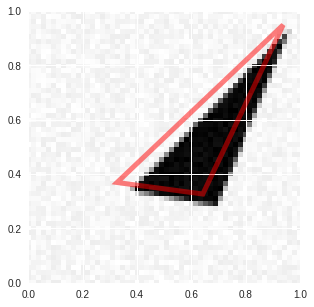

[0.32674572 0.36908528 0.6423877  0.32656798 0.93802077 0.9488281 ] [0.36340393 0.33217252 0.67661723 0.27556678 0.94133439 0.93818117]


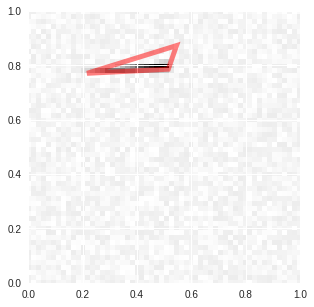

[0.21645097 0.77069855 0.5154195  0.7858769  0.5456395  0.87272006] [0.17839825 0.77686033 0.51306942 0.78858177 0.49350036 0.81401674]


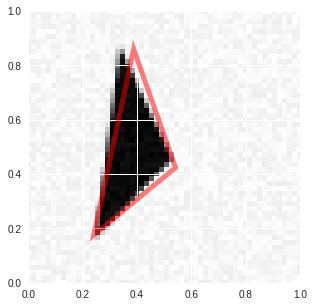

[0.24103764 0.17596264 0.54190105 0.42413697 0.38794753 0.85979897] [0.23325432 0.15415605 0.5149824  0.45317341 0.32182751 0.87390724]


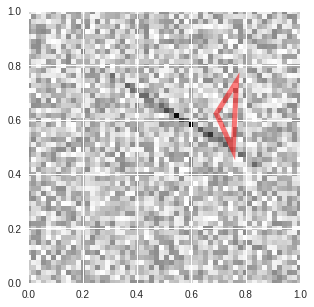

[0.7540069  0.48785353 0.69207066 0.62274295 0.76628    0.7400256 ] [0.16213195 0.84262262 0.57681979 0.58680997 0.91139454 0.37708317]


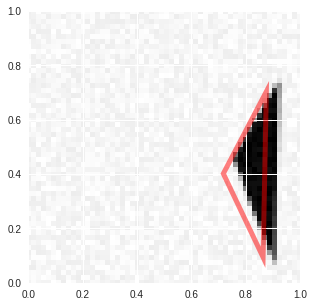

[0.86416733 0.0940375  0.7179127  0.4016452  0.8761558  0.7035451 ] [0.88877703 0.05455311 0.73548441 0.45606621 0.90340186 0.74689834]


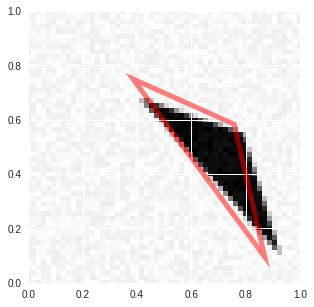

[0.87006724 0.09592021 0.38527775 0.750071   0.75821173 0.5829792 ] [0.90700812 0.09480827 0.39686117 0.68093838 0.77639342 0.5454629 ]


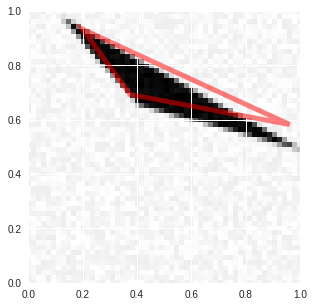

[0.37557846 0.6924445  0.20071456 0.9324075  0.96133345 0.58254045] [0.38897812 0.65559303 0.11002962 0.9821957  0.99000801 0.48365552]


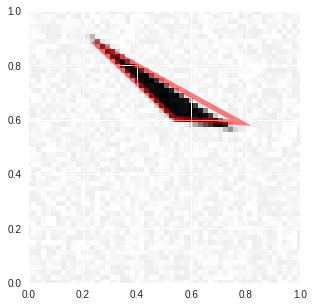

[0.5374955  0.60508573 0.2408585  0.8872077  0.78108764 0.5897939 ] [0.52210146 0.59545851 0.20474728 0.92011873 0.74751949 0.55935637]


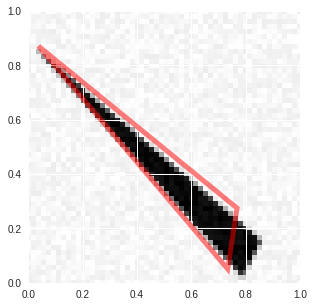

[0.7339299  0.0505049  0.03794916 0.87082034 0.768287   0.27487025] [0.77154584 0.00714704 0.00887329 0.87257706 0.8403276  0.14630711]


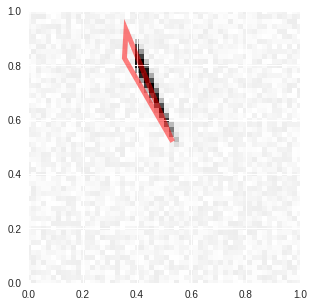

[0.53086925 0.5197321  0.35411772 0.82687736 0.36003673 0.9305485 ] [0.53752479 0.4952376  0.37436498 0.80601878 0.38379868 0.90312727]


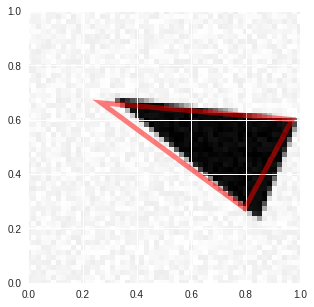

[0.26824236 0.6620147  0.79710734 0.2736178  0.97122836 0.60058594] [0.29722928 0.68424992 0.83263574 0.22478058 0.97026168 0.59832627]


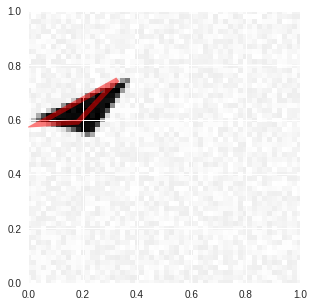

[0.0329933  0.5824689  0.18206008 0.5909354  0.3285555  0.74738234] [0.00344637 0.60283681 0.21915369 0.53857817 0.36086731 0.7552982 ]


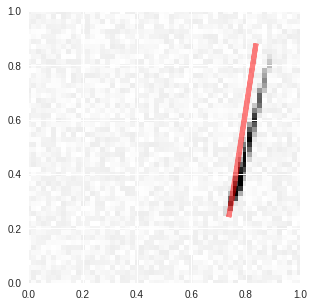

[0.73803216 0.24176458 0.76382875 0.39070988 0.838172   0.88025093] [0.70854721 0.24284739 0.76655309 0.33553221 0.88021791 0.8728372 ]


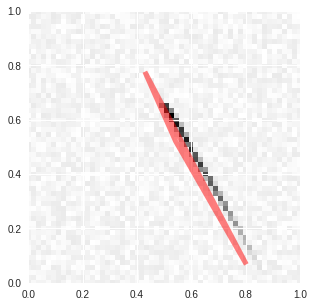

[0.80239123 0.06792048 0.54249686 0.52038497 0.42930493 0.77627695] [0.85368129 0.01948352 0.46915234 0.66784599 0.4997198  0.65245444]


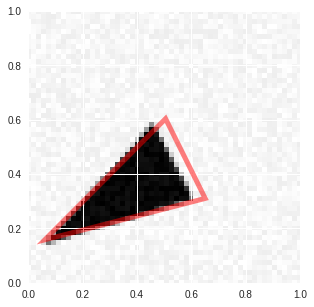

[0.06103323 0.15822612 0.65113366 0.31042325 0.5054185  0.60374624] [0.04398499 0.13041436 0.59025887 0.30202414 0.44441998 0.5849939 ]


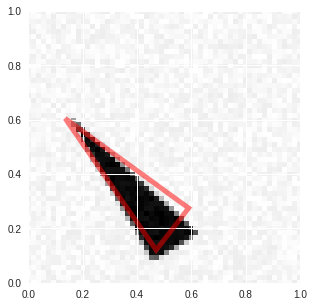

[0.47085968 0.12054607 0.13598055 0.60467845 0.5902429  0.2750136 ] [0.44413071 0.07163501 0.13727634 0.6115006  0.60972935 0.17294583]


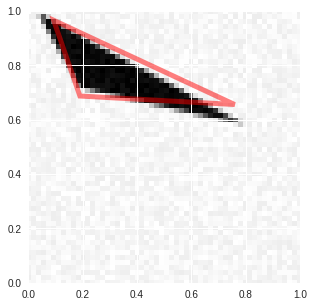

[0.19030675 0.6872357  0.09364123 0.96587    0.759505   0.6559464 ] [0.17418796 0.71993218 0.02619378 0.99750273 0.78142869 0.57982966]


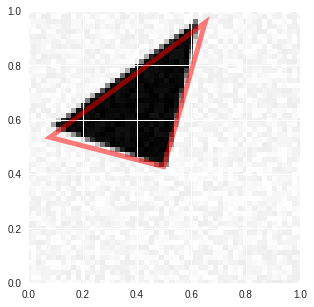

[0.08010814 0.53524315 0.49842817 0.42743856 0.6511491  0.9574654 ] [0.07394745 0.57257971 0.48887978 0.42231603 0.61184858 0.9750264 ]


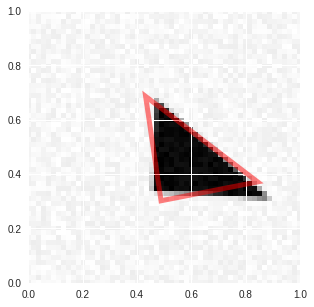

[0.48875934 0.3018392  0.43204993 0.68588763 0.84416825 0.37122032] [0.44416567 0.33037206 0.45311888 0.67686012 0.87141638 0.30311524]


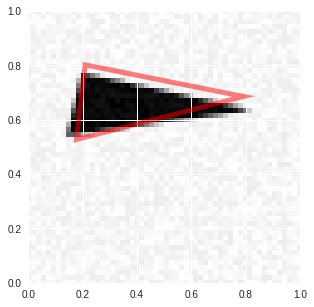

[0.17744753 0.5271583  0.20950934 0.8018334  0.79216325 0.6853589 ] [0.12782236 0.53628228 0.18096831 0.77341749 0.80704549 0.6364686 ]


In [0]:
print('loss:', model_regr.evaluate(X_test,Y_test))
for i in range(20):
  pred = model_reg.predict(X_test)[i]
  visualize_prediction(X_test[i],pred)
  print(pred,Y_test[i])

Les résultats sont plutot bons, sauf sur les triangles trop plats.

# **Denoising**

Nous implémentons la démarche classique pour le debruitage d'image avec les réseaux U-Net.

In [0]:
def get_crop_shape(target, refer):
        # width, the 3rd dimension
        cw = (target.get_shape()[2] - refer.get_shape()[2]).value
        assert (cw >= 0)
        if cw % 2 != 0:
            cw1, cw2 = int(cw/2), int(cw/2) + 1
        else:
            cw1, cw2 = int(cw/2), int(cw/2)
        # height, the 2nd dimension
        ch = (target.get_shape()[1] - refer.get_shape()[1]).value
        assert (ch >= 0)
        if ch % 2 != 0:
            ch1, ch2 = int(ch/2), int(ch/2) + 1
        else:
            ch1, ch2 = int(ch/2), int(ch/2)

        return (ch1, ch2), (cw1, cw2)
    
input_shape = (72,72,1)    
inputs = Input(input_shape)
conv1 = Conv2D(32, kernel_size = (3,3), activation = 'relu',padding="same")(inputs)
BN1   = BatchNormalization()(conv1)
conv1 = Conv2D(32, kernel_size = (3,3), activation = 'relu',padding="same")(BN1)
BN1   = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(BN1)
conv2 = Conv2D(64, kernel_size = (3,3), activation = 'relu',padding="same")(pool1)
BN2   = BatchNormalization()(conv2)
conv2 = Conv2D(64, kernel_size = (3,3), activation = 'relu',padding="same")(BN2)
BN2   = BatchNormalization()(conv2)
pool3 = MaxPooling2D(pool_size=(2, 2))(BN2)
conv3 = Conv2D(128, kernel_size = (3,3), activation = 'relu',padding="same")(pool3)
BN3  = BatchNormalization()(conv3)
conv3 = Conv2D(128, kernel_size = (3,3), activation = 'relu',padding="same")(BN3)
BN3   = BatchNormalization()(conv3)

up_conv3 = UpSampling2D(size = (2,2))(BN3)
ch, cw = get_crop_shape(conv2, up_conv3) 
crop_conv2 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv2)
up4 = concatenate([up_conv3,crop_conv2], axis = 3)
conv4 = Conv2D(64, kernel_size = (3,3), activation = 'relu',padding="same")(up4)
BN4  = BatchNormalization()(conv4)
conv4 = Conv2D(64, kernel_size = (3,3), activation = 'relu',padding="same")(BN4)
BN4 = BatchNormalization()(conv4)

up_conv2 = UpSampling2D(size = (2,2))(BN4)
ch, cw = get_crop_shape(conv1, up_conv2) 
crop_conv1 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv1)
up5 = concatenate([up_conv2,crop_conv1], axis = 3)
conv5 = Conv2D(32, kernel_size = (3,3), activation = 'relu',padding="same")(up5)
BN5   = BatchNormalization()(conv5)
conv5 = Conv2D(32, kernel_size = (3,3), activation = 'relu',padding="same")(BN5)
BN5   = BatchNormalization()(conv5)

ch, cw = get_crop_shape(inputs, BN5)
conv6 = ZeroPadding2D(padding=((ch[0], ch[1]), (cw[0], cw[1])))(BN5)
conv7 = Conv2D(1, (1, 1),activation = 'hard_sigmoid')(conv6)


model_unet = Model(input = inputs, output = conv7)


model_unet.compile(optimizer = 'adam', loss = 'mse')
    
model_unet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 72, 72, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 72, 72, 32)   128         conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 72, 72, 32)   9248        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
batch_norm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [0]:
X_train,Y_train = generate_dataset_classification_noise(1000,30)
X_val,Y_val = generate_dataset_classification_noise(100,30)
X_test,Y_test = generate_dataset_classification_noise(300,30)
size = int(np.sqrt(X_train.shape[1]))
input_shape = (size,size,1)

def processing_data(X,Y) :
    nb_samples = X.shape[0]
    X = X.reshape(nb_samples,size,size,1)
    Y = Y.reshape(nb_samples,size,size,1)
    return X,Y

X_train,Y_train =  processing_data(X_train,Y_train)
X_val,Y_val =  processing_data(X_val,Y_val)
X_test,Y_test =  processing_data(X_test,Y_test)

Creating data:
Creating data:
Creating data:


In [0]:
batch_size = 32
epochs = 50

earlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='auto')
model_unet.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,validation_data = (X_val,Y_val),callbacks = [earlyStopping])

Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0683 - val_loss: 0.0035
Epoch 2/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0091 - val_loss: 8.9538e-04
Epoch 3/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0022 - val_loss: 8.8022e-04
Epoch 4/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0011 - val_loss: 6.3965e-04
Epoch 5/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0010 - val_loss: 6.6439e-04
Epoch 6/50
1000/1000 [==============================] - 4s 4ms/step - loss: 8.4980e-04 - val_loss: 3.7428e-04
Epoch 7/50
1000/1000 [==============================] - 4s 4ms/step - loss: 9.5503e-04 - val_loss: 6.0765e-04
Epoch 8/50
1000/1000 [==============================] - 4s 4ms/step - loss: 3.9505e-04 - val_loss: 4.2616e-04
Epoch 9/50
1000/1000 [==============================] - 4s 4ms/step - loss: 3.1205e-04 - val_loss

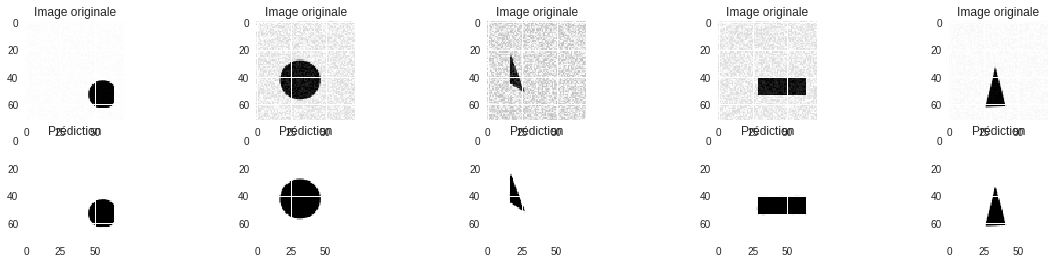

In [0]:
pred = model_unet.predict(X_test)
n = 5
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(72, 72))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    ax.set_title('Image originale')
    # reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(pred[i].reshape(72, 72))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    ax.set_title('Prédiction')
plt.show()